In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data
df = pd.read_csv("Housing.csv")

# Let's take a look at the dataset
print(df.info())
print(df.head())

# Encoding
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no    

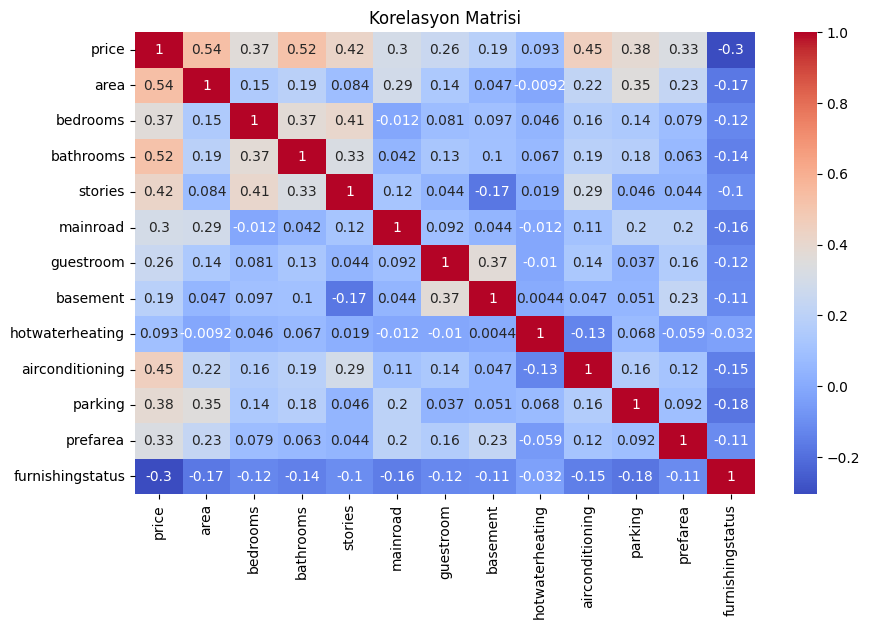

In [4]:
# Correlation Matrix

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()


In [5]:

# Select the target and feature
X = df.drop('price', axis=1)
y = df['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

Linear Regression R²: 0.6494754192267803
Random Forest R²: 0.6115321143409216



Feature Importance (Random Forest):
area: 0.4704
bedrooms: 0.0480
bathrooms: 0.1527
stories: 0.0548
mainroad: 0.0101
guestroom: 0.0159
basement: 0.0317
hotwaterheating: 0.0171
airconditioning: 0.0623
parking: 0.0566
prefarea: 0.0300
furnishingstatus: 0.0504


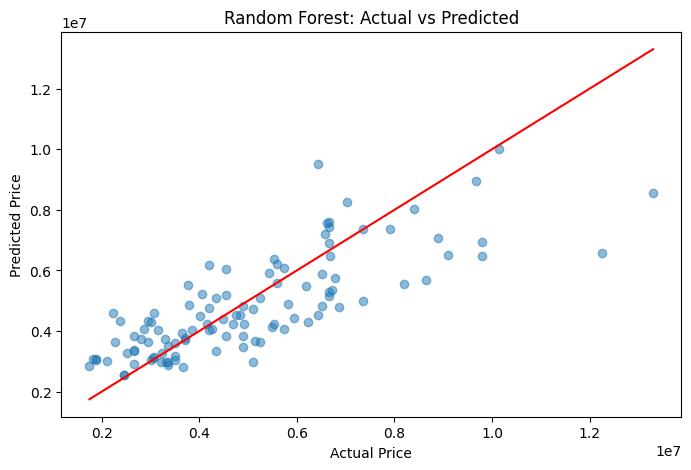

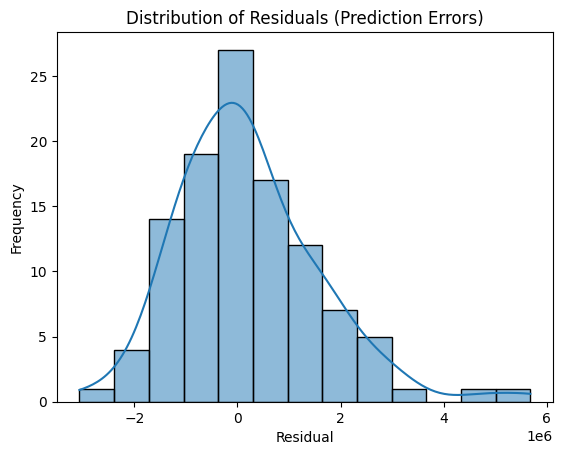

In [6]:
# --- FEATURE IMPORTANCE FROM RANDOM FOREST ---

# Display feature importance
print("\nFeature Importance (Random Forest):")
for name, score in zip(X.columns, rf.feature_importances_):
    print(f"{name}: {score:.4f}")

# --- SCATTER PLOT OF PREDICTED VS ACTUAL VALUES ---

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

# --- RESIDUAL ANALYSIS ---

residuals = y_test - y_pred_rf
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals (Prediction Errors)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()